In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
import numpy as np

%matplotlib inline

import pydotplus
from IPython.display import Image

In [2]:
# Loading data

df_churn = pd.read_csv("processed_data.csv")
df_churn.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [3]:
X = df_churn.drop('Exited', axis=1) 
y = df_churn['Exited']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [5]:
#Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)

In [6]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [7]:
predictions = rf_model.predict(X_test)

In [8]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [9]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2284,70
Actual 1,351,295


Accuracy Score : 0.8596666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2354
           1       0.81      0.46      0.58       646

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.85      0.86      0.84      3000



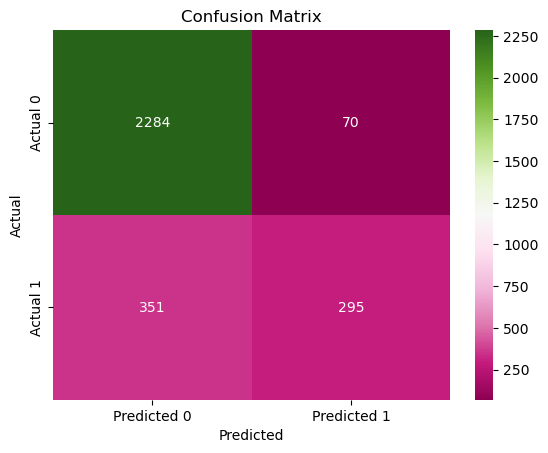

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap using Seaborn
sns.heatmap(cm_df, annot=True, cmap="PiYG", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.22262424585120283, 'Age'),
 (0.12143909715448001, 'NumOfProducts'),
 (0.11850581713688393, 'CreditScore'),
 (0.11850070959880671, 'CustomerId'),
 (0.11814437623412102, 'EstimatedSalary'),
 (0.11788824326768353, 'Balance'),
 (0.071457553465811, 'Tenure'),
 (0.03354026417723655, 'IsActiveMember'),
 (0.0209192527668266, 'Geography_Germany'),
 (0.017404227033938326, 'HasCrCard')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

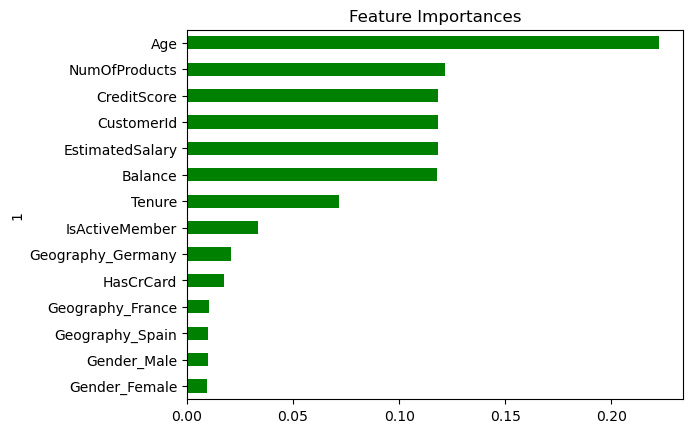

In [12]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Feature Importances', legend=False)

In [13]:
print('Parameters currently in use:\n')
pprint(rf_model.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}


In [29]:
# Define Parameters
max_depth=[2, 8, None]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.80942857 0.80828571 0.80857143 0.85857143 0.86085714 0.859
 0.85542857 0.857      0.859     ], using {'max_depth': 8, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185183,0.011343,0.014740,0.000288,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.804286,0.810000,0.806429,0.815000,0.811429,0.809429,0.003763,7
1,0.386437,0.023363,0.027480,0.001024,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.807857,0.810714,0.804286,0.808571,0.810000,0.808286,0.002241,9
2,0.761792,0.022809,0.060134,0.010268,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.810000,0.810000,0.809286,0.805000,0.808571,0.808571,0.001863,8
3,0.348010,0.003600,0.019979,0.000150,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.870714,0.850714,0.851429,0.867143,0.852857,0.858571,0.008560,4
4,0.713461,0.009156,0.039311,0.001834,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.870714,0.849286,0.854286,0.871429,0.858571,0.860857,0.008846,1
5,1.397229,0.016536,0.073621,0.000568,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.872143,0.848571,0.852857,0.867857,0.853571,0.859000,0.009243,2
6,0.488655,0.001773,0.025571,0.000214,None,64,"{'max_depth': None, 'n_estimators': 64}",0.865714,0.838571,0.847857,0.874286,0.850714,0.855429,0.012846,6
7,0.972562,0.015516,0.048423,0.000403,None,128,"{'max_depth': None, 'n_estimators': 128}",0.863571,0.842143,0.857143,0.872143,0.850000,0.857000,0.010414,5
8,1.942817,0.004974,0.095309,0.001361,None,256,"{'max_depth': None, 'n_estimators': 256}",0.865714,0.845000,0.855000,0.877143,0.852143,0.859000,0.011254,2


([<matplotlib.axis.YTick at 0x7f8bd9e26550>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

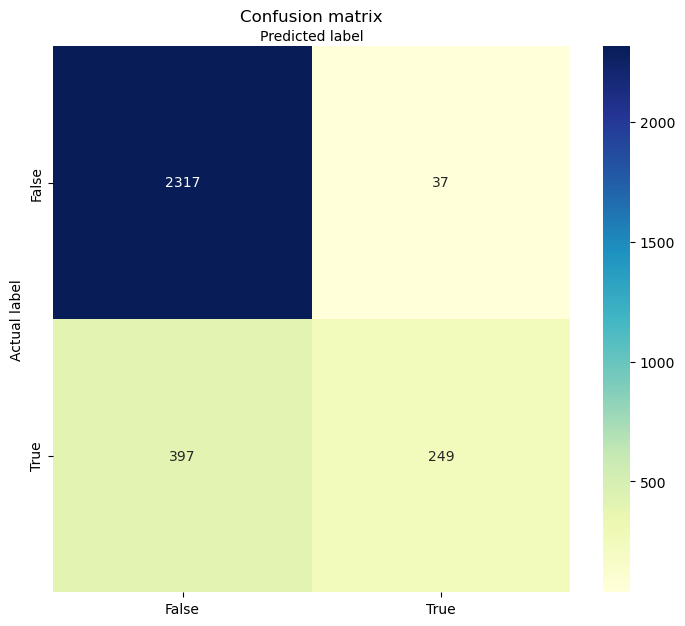

In [30]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [33]:
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy_1)

Accuracy 0.8553333333333333


In [39]:
rf_model_bestfit = RandomForestClassifier(n_estimators=256, random_state=12, max_depth=None)

In [40]:
rf_model_bestfit = rf_model_bestfit.fit(X_train, y_train)

In [41]:
predictions_2 = rf_model_bestfit.predict(X_test)

In [42]:
# Calculating the confusion matrix
cm_2 = confusion_matrix(y_test, predictions)
cm_2_df = pd.DataFrame(
    cm_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)

In [43]:
# Displaying results
print("Confusion Matrix")
display(cm_2_df)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test, predictions_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2284,70
Actual 1,351,295


Accuracy Score : 0.8613333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2354
           1       0.82      0.45      0.58       646

    accuracy                           0.86      3000
   macro avg       0.85      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000

